<a href="https://colab.research.google.com/github/varunkr24/Machine-Learning/blob/Python/Classify_Abnormal_BP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
from sklearn.model_selection import train_test_split
import copy
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
from IPython.display import display
pd.set_option('display.max_rows', 500)

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['TrainingDataAbnormalBloodPressure.csv']))

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df['Blood_Pressure_Abnormality'].value_counts(normalize=True)

In [ ]:
df.isnull().mean()*100

In [ ]:
df['Sex'].value_counts()

In [ ]:
df[df['Sex']==1]['Pregnancy'].isnull().sum()

In [ ]:
df[df['Sex']==0]['Pregnancy'].isnull().sum()

In [ ]:
df['Pregnancy'].value_counts()

In [ ]:
df[(df['Sex']==1) & (df['Pregnancy'].isnull())]['Age'].agg(['min','max'])

In [ ]:
df[(df['Sex']==1) & (df['Pregnancy'] ==1)]['Age'].agg(['min','max'])

In [ ]:
df[df['alcohol_consumption_per_day'].isnull()]

In [ ]:
df.groupby('Blood_Pressure_Abnormality').mean()

In [ ]:
sns.pairplot(df, x_vars=df.columns[0:8], y_vars=df.columns[8:])

In [ ]:
def type_columns(df,type_req):
    type_req_cols = df.select_dtypes(include =[type_req]).columns
    return(type_req_cols.to_list())

In [ ]:
int_cols = type_columns(df,'int64')
int_cols

In [ ]:
float_cols = type_columns(df, 'float64')
float_cols

In [ ]:
int_cols =  [col for col in int_cols if col not in ['Patient_Number','Blood_Pressure_Abnormality','Sex','Smoking','Chronic_kidney_disease','Adrenal_and_thyroid_disorders','Level_of_Stress'] ]
int_cols

In [ ]:
float_cols.extend(int_cols)
float_cols

In [ ]:
float_cols.remove('Pregnancy')

In [ ]:
object_cols = [col for col in df.columns if (col not in float_cols and col not in int_cols)]
object_cols

In [ ]:
len(float_cols + object_cols), df.shape[1]

In [ ]:
rows_float_cols = int(np.ceil(len(float_cols)/3))
rows_float_cols

In [ ]:
#let's get distribution plot of these variables
f, axes = plt.subplots(rows_float_cols, 3,figsize=(15,15))
i = 1
for col in float_cols:
    plt.subplot(rows_float_cols,3,i)
    sns.histplot( data=df, x = col)
    i = i+1

In [ ]:
sns.histplot(np.log(df['Level_of_Hemoglobin']))

In [ ]:
#let's get boxplots of these variables
f, axes = plt.subplots(rows_float_cols, 3,figsize=(15,15))
i = 1
for col in float_cols:
    plt.subplot(rows_float_cols,3,i)
    sns.boxplot(x='Blood_Pressure_Abnormality',y= col, data=df)
    i = i+1

In [ ]:
sns.boxplot(x=df['Blood_Pressure_Abnormality'], y=np.log(df['Level_of_Hemoglobin']))

In [ ]:
#Outlier Percentage
len(df[(df['Level_of_Hemoglobin'] >= 15) & (df['Blood_Pressure_Abnormality']==0)])/len(df[df['Blood_Pressure_Abnormality']==0])*100

In [ ]:
df.corr().round(decimals=2)

In [ ]:
df[df['alcohol_consumption_per_day'].isnull()].agg(['min','max','mean','median']).T

In [ ]:
df[df['alcohol_consumption_per_day']!=np.nan].agg(['min','max','mean','median']).T

Data Preprocessing

In [ ]:
object_cols.remove('Patient_Number')
object_cols.remove('Blood_Pressure_Abnormality')
object_cols

In [ ]:
float_cols

In [ ]:
independent_cols = copy.deepcopy(float_cols)
independent_cols.extend(object_cols)
independent_cols

In [ ]:
target_col = 'Blood_Pressure_Abnormality'
target_col

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[independent_cols], df[target_col], test_size=0.10, random_state=1)

In [ ]:
X_train.head()

In [ ]:
X_train[float_cols] = X_train[float_cols].astype('float')

In [ ]:
X_train[object_cols] = X_train[object_cols].astype('object')

In [ ]:
X_train.dtypes

In [ ]:
X_test[float_cols] = X_test[float_cols].astype('float')
X_test[object_cols] = X_test[object_cols].astype('category')

Missing value treatment

In [ ]:
X_train['Pregnancy'].replace(np.nan, 0, inplace=True)

In [ ]:
X_test['Pregnancy'].replace(np.nan, 0, inplace=True)

In [ ]:
X_train.head()

In [ ]:
#Simple Imputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
imp_median.fit(X_train)

In [ ]:
X_train = pd.DataFrame(imp_median.transform(X_train))

In [ ]:
X_train.head()

In [ ]:
X_train.columns = independent_cols

In [ ]:
X_train.isnull().sum()

Transform Test data

In [ ]:
X_test = pd.DataFrame(imp_median.transform(X_test))

In [ ]:
X_test.columns = independent_cols

In [ ]:
X_test.isnull().sum()

Logarithmmic transformation on Level_of_Hemoglobin ?

Standard Scaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[float_cols])

In [ ]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train[float_cols]), columns=float_cols)

In [ ]:
X_train_scaled.head()

In [ ]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test[float_cols]), columns=float_cols)

In [ ]:
#X_std = pd.merge(X_numeric_std, X[categorical], left_index=True, right_index=True)

One hot encoding

In [ ]:
one_hot_cols = copy.deepcopy(object_cols)
one_hot_cols

In [ ]:
one_hot_cols.remove('Level_of_Stress')
one_hot_cols

In [ ]:
ordinal_col = 'Level_of_Stress'

In [ ]:
df_train_ohc = copy.deepcopy(X_train[object_cols])
df_test_ohc = copy.deepcopy(X_test[object_cols])

In [ ]:
for i in one_hot_cols:
    s = pd.get_dummies(df_train_ohc[one_hot_cols][i],prefix=i,drop_first = True)         # get dummies for the categorical variables and concat to X
    df_train_ohc = pd.concat([df_train_ohc,s], axis = 1)
    t = pd.get_dummies(df_test_ohc[i],prefix=i,drop_first = True)         # get dummies for the categorical variables and concat to X
    df_test_ohc = pd.concat([df_test_ohc,t], axis = 1)

In [ ]:
df_train_ohc.drop(one_hot_cols, inplace=True, axis = 1)

In [ ]:
df_test_ohc.drop(one_hot_cols, inplace=True, axis = 1)

In [ ]:
df_train_ohc.head()

In [ ]:
X_train_scaled_ohc = pd.merge(X_train_scaled, df_train_ohc, left_index=True, right_index=True)
X_test_scaled_ohc = pd.merge(X_test_scaled, df_test_ohc, left_index=True, right_index=True)

In [ ]:
X_train_scaled_ohc.head()

In [ ]:
X_test_scaled_ohc.head()

In [ ]:
X_test_scaled_ohc.dtypes

In [ ]:
X_train_scaled_ohc[ordinal_col] = X_train_scaled_ohc[ordinal_col].astype('int')

In [ ]:
X_train_scaled_ohc.head()

In [ ]:
X_test_scaled_ohc[ordinal_col] = X_test_scaled_ohc[ordinal_col].astype('int')

In [ ]:
X_test_scaled_ohc.head()

In [ ]:
#importing necessary libarries
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on training data
logit_model = LogisticRegression(solver="liblinear", random_state=123)
logit_model.fit(X_train_scaled_ohc, y_train)

#predict on test data
y_test_predict = logit_model.predict(X_test_scaled_ohc)

In [ ]:
print(logit_model.score(X_train_scaled_ohc, y_train))

In [ ]:
print(logit_model.score(X_test_scaled_ohc, y_test))

In [ ]:
from sklearn.metrics import roc_curve, auc_roc_score

#finding out probabilities from the same model
predict_probabilities = logit_model.predict_proba(X_test_scaled_ohc)
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict)
auc_score = roc_auc_score(y_test, y_test_predict)
print(auc_score)

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

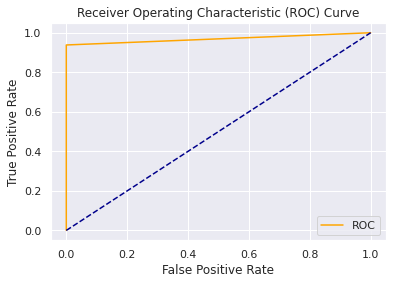

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', logit_model)])

In [ ]:
# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)